In [1]:
%load_ext autoreload
%autoreload 2

## This is a tutorial on `hist` mode scenario of `plot` class.

In [2]:
# Necessary imports
import sys
import numpy as np

sys.path.append('../..')
from batchflow import plot

In [3]:
# Sample data generation
shape = (50, 50)

image_0 = np.random.normal(loc=np.random.rand(), size=shape)
image_1 = np.random.normal(scale=np.random.rand(), size=shape)

This is the usual way to display several images.

To make make histogram plot of them, simply specify the mode of the same name.

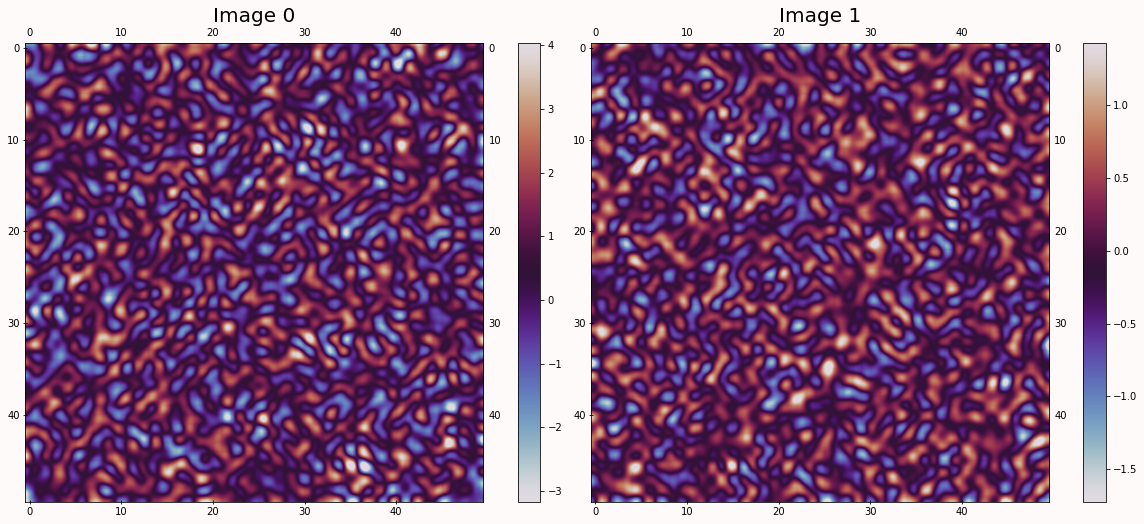

In [4]:
imshow_params = {
    'cmap': 'twilight',
    'interpolation': 'sinc',
    'colorbar': True,
    'title': ['Image 0', 'Image 1']}

plot([image_0, image_1], combine='separate', **imshow_params)

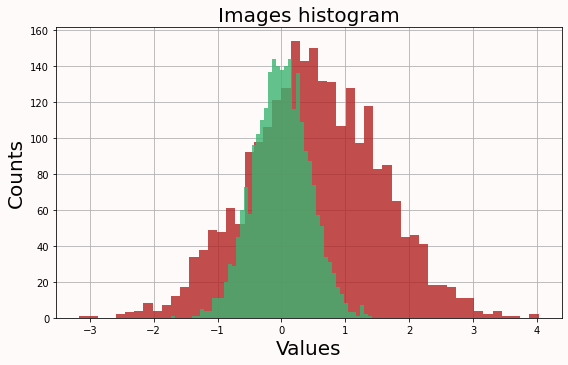

In [5]:
hist_params = {
    'mode': 'hist',
    'title_label': 'Images histogram',
    'grid': True,
}

plot([image_0, image_1], **hist_params)

When parameter name collision occurs, simply prefix it with specific method alias followed by underscore.

Example below show, how to specify that `label` argument is meant for legend (and not for title or tick labels).

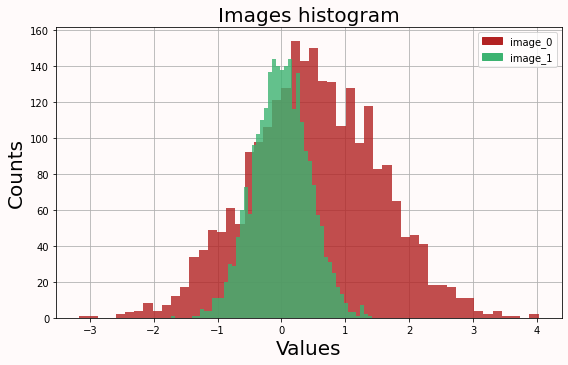

In [6]:
hist_params['legend_label'] = ['image_0', 'image_1']

plot([image_0, image_1], **hist_params)

There are a few default params, but to use more advanced prefix names to specify the method they are meant for.

Example below shows, how to specify `histtype` argument is redirected to the list of parameters for `plt.hist` via prefix.

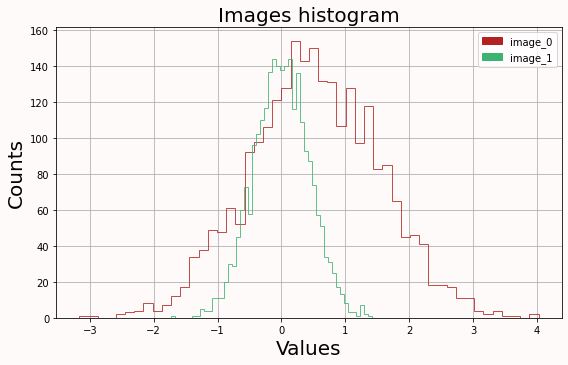

In [7]:
plot([image_0, image_1], hist_histtype='step', **hist_params)

To display histograms separately use `combine='separate'` bool flag.

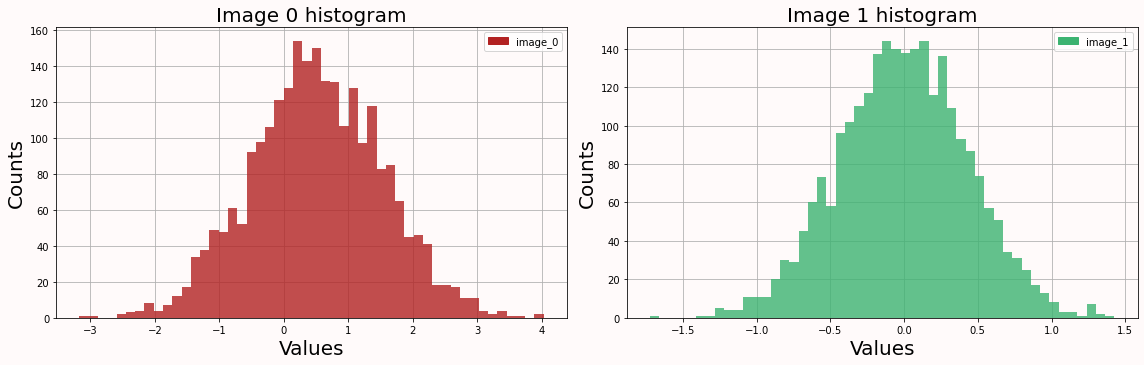

In [8]:
hist_params['title'] = ['Image 0 histogram', 'Image 1 histogram']

plot([image_0, image_1], combine='separate', **hist_params)

To display histograms in 'mixed' manner, i.e. with some histograms overlaid and some displayed separately, use nested lists of histograms arrays.

If list has level 2 nestedness, outer level defines subplots order while inner one defines layers order.

Note, that parameters should have same nestedness level.

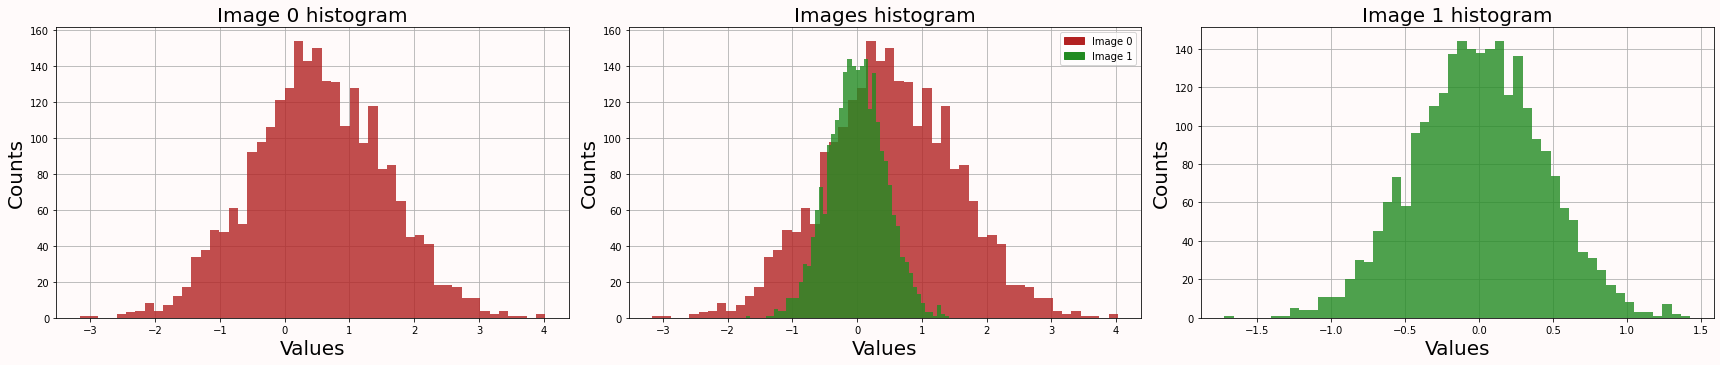

In [9]:
mixed_hist_params = {
    'mode': 'hist',
    'color': ['firebrick', ['firebrick', 'forestgreen'], 'forestgreen'],
    'title': ['Image 0 histogram', 'Images histogram', 'Image 1 histogram'],
    'legend_label': [None, ['Image 0', 'Image 1'], None]
}

plot([image_0, [image_0, image_1], image_1], **mixed_hist_params)

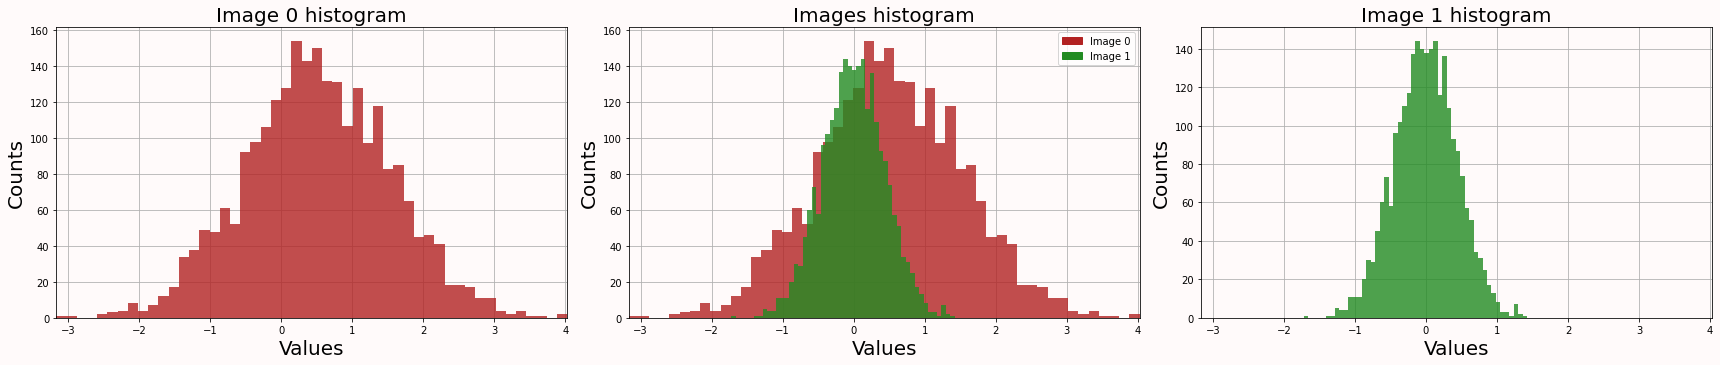

In [10]:
mixed_hist_params['xlim'] = (min(image_0.min(), image_1.min()), max(image_0.max(), image_1.max()))

plot([image_0, [image_0, image_1], image_1], **mixed_hist_params)

To create plots with mixed-type visualizations one can provide shapes for future subplots or use `None` placeholder in `data`.

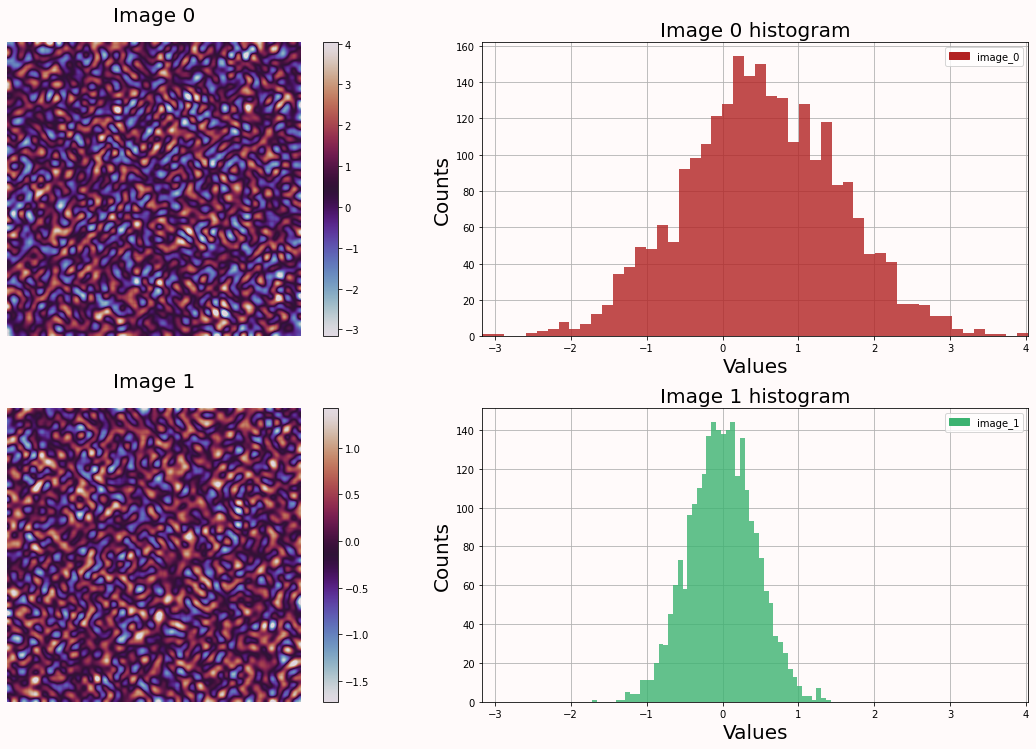

In [11]:
hist_subplot_shape = (50, 100)
canvas = plot([image_0, hist_subplot_shape, image_1, hist_subplot_shape], combine='separate', ncols=2, **imshow_params) 

hist_params['xlim'] = mixed_hist_params['xlim']
canvas.plot(data=[None, image_0, None, image_1], combine='separate', **hist_params)